In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random

In [23]:
# # adjust for firing freq
# slope_f = 10 #2
# mn_b = 20 #60
# mn_a = 0

# cm = 10
# g_L = 2.5
# E_L = -61
# V_T = -50
# V_thr = 0
# V_reset = -58
# mn_tau_w = 30

# parameters found via sbi
cm = 58.8824
g_L = 3.5285
E_L = -36.5584
V_T = -38.2528
slope_f = 12.0195
mn_a = 8.6418
mn_tau_w = 53.1160
mn_b =  77.3416
V_reset = -46.1439
V_thr = 25


time = 5000
delta_t = 0.1
n_timesteps = len(np.arange(0,time,delta_t))
n_ains = 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15.4


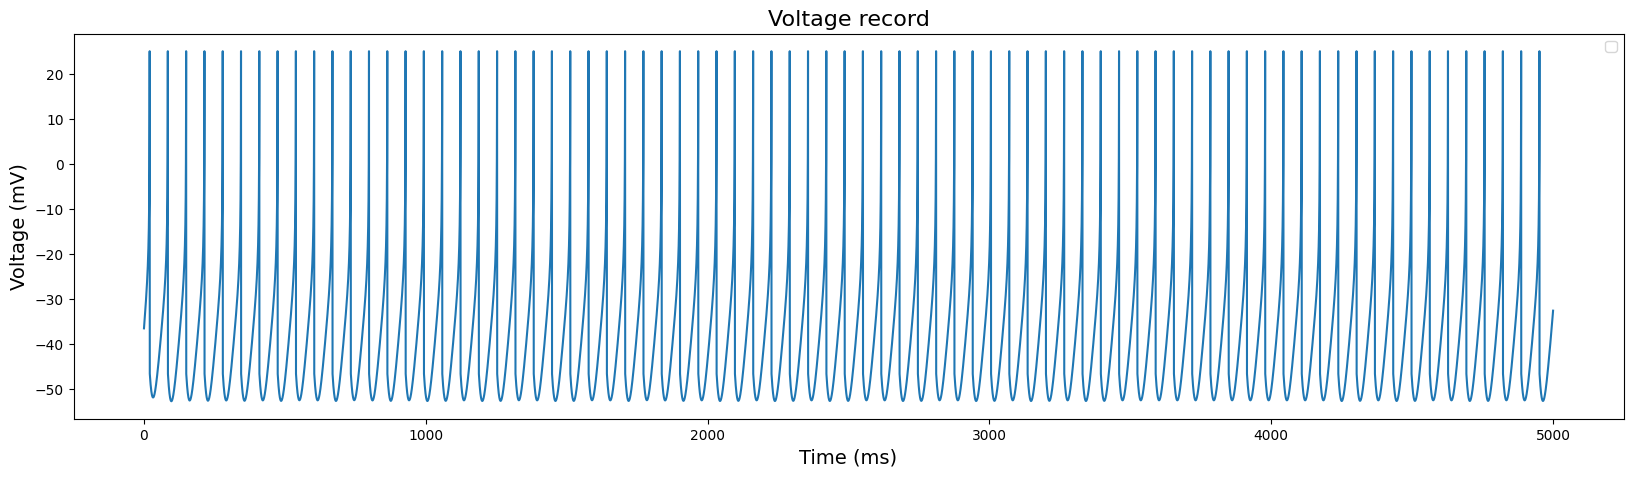

In [24]:
ain_w = np.zeros((n_ains,1))
ain_voltage_vec = np.zeros((n_ains,1))
ain_voltage_vec[:,:] += E_L
ain_voltage_record = np.zeros((1,n_timesteps))
ain_spike_times = [[] for m in range(n_ains)]
vs_to_plot = []
ws = []
spike_count = 0

# want aIN to fire at 90Hz with 100pA of current

for idx,t in enumerate(np.arange(0,time,delta_t)):
    I = 0
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_reset
    if ain_voltage_vec[0,-1] < -40 and ain_voltage_vec[0,-1] > -60:       
        vs_to_plot.append(ain_voltage_vec[0,-1])
        ws.append(ain_w[0,-1])
    ain_voltage_vec[:,-1] += delta_t*((-g_L*(ain_voltage_vec[:,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:,-1] - V_T)/slope_f) \
                                       + I - ain_w[:,-1]) / cm)
    ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_thr
            ain_spike_times[ain].append(t)
            spike_count += 1
            ain_w[ain,-1] += mn_b
    ain_voltage_record[:,idx] += ain_voltage_vec[:,:].squeeze()
print(spike_count/5)
x = np.arange(0,time,delta_t) 

vnull_ws = []
wnull_ws = []
vnull = np.arange(-60,-40,1)
for V in np.arange(-60,-40,1):
    vnull_w = -g_L * (V - E_L) + g_L * slope_f * np.exp((V - V_T)/slope_f) + I
    wnull_w = mn_a*(V - E_L)
    vnull_ws.append(vnull_w)
    wnull_ws.append(wnull_w)
plt.figure(figsize=(20, 5))
plt.plot(x, ain_voltage_record[-1,:])
plt.title('Voltage record',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
plt.legend()

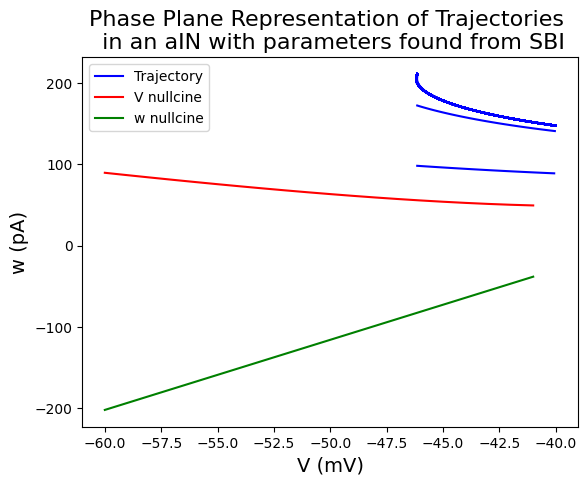

In [27]:
# phase plane analysis

idxs = [0]

for idx,v in enumerate(vs_to_plot):
    if v == V_reset: #and vs_to_plot[idx-1] > -46:
        idxs.append(idx)
split_vs = []
split_ws = []
for idx,val in enumerate(idxs):
    if idx < len(idxs)-1:
        split_vs.append(vs_to_plot[val:idxs[idx+1]])
        split_ws.append(ws[val:idxs[idx+1]])
    else:
        split_vs.append(vs_to_plot[val:])
        split_ws.append(ws[val:])
        

for idx,(traj_v,traj_w) in enumerate(zip(split_vs,split_ws)):
    if idx == 0:
        plt.plot(traj_v,traj_w,color='b',label='Trajectory')
    else:
        plt.plot(traj_v,traj_w,color='b')
plt.plot(vnull, vnull_ws,color='r',label='V nullcine')
plt.plot(vnull, wnull_ws,color='g',label='w nullcine')
plt.title('Phase Plane Representation of Trajectories \n in an aIN with parameters found from SBI', fontsize='16')
plt.xlabel('V (mV)',fontsize='14')
plt.ylabel('w (pA)',fontsize='14')
plt.legend()
plt.savefig('phaseplane_ain_sbiparams.png')

In [25]:
Is = [0, 25, 35, 45, 50, 75, 100, 125, 150]
# Is = [50, 75, 100, 125]
ain_av_vs = []
ain_fr = []

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


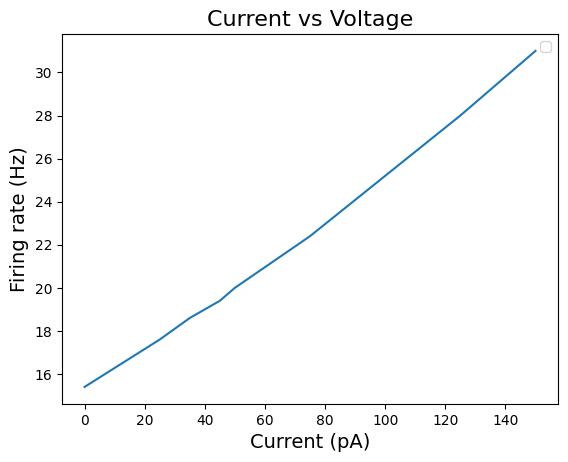

In [26]:
for I in Is:
    ain_w = np.zeros((n_ains,1))
    ain_voltage_vec = np.zeros((n_ains,1))
    ain_voltage_vec[:,:] += E_L
    ain_voltage_record = np.zeros((1,n_timesteps))
    ain_spike_times = [[] for m in range(n_ains)]
    vs_to_plot = []
    ws = []
    spike_count = 0
    for idx,t in enumerate(np.arange(0,time,delta_t)):
        for ain in range(n_ains):
            if ain_voltage_vec[ain,-1] >= V_thr:
                ain_voltage_vec[ain,-1] = V_reset
        if ain_voltage_vec[0,-1] < -40 and ain_voltage_vec[0,-1] > -60:       
            vs_to_plot.append(ain_voltage_vec[0,-1])
            ws.append(ain_w[0,-1])
        ain_voltage_vec[:,-1] += delta_t*((-g_L*(ain_voltage_vec[:,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:,-1] - V_T)/slope_f) \
                                        + I - ain_w[:,-1]) / cm)
        ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
        for ain in range(n_ains):
            if ain_voltage_vec[ain,-1] >= V_thr:
                ain_voltage_vec[ain,-1] = V_thr
                ain_spike_times[ain].append(t)
                spike_count += 1
                ain_w[ain,-1] += mn_b
        ain_voltage_record[:,idx] += ain_voltage_vec[:,:].squeeze()
    ain_fr.append(spike_count/5)


x = np.arange(0,time,delta_t) 

plt.plot(Is, ain_fr)
plt.title('Current vs Voltage',fontsize='16')
plt.xlabel('Current (pA)',fontsize='14')
plt.ylabel('Firing rate (Hz)',fontsize='14')
plt.legend()
plt.savefig('fIcurve_ain.png')